In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# dataset
df = pd.read_csv("input/divorce.csv")

In [3]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [4]:
Y = df.Divorce_Y_N
X = df.drop(['Divorce_Y_N'],axis=1)

In [5]:
# splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [6]:
# Predicting Divorce using KNeighbors Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
Y_pred = neigh.predict(X_test)

In [8]:
CM = confusion_matrix(Y_test, Y_pred)

In [9]:
print(CM)
print(classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc*100} %")

[[28  0]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        29

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

Accuracy: 98.24561403508771 %


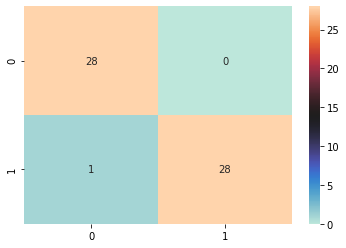

In [10]:
sns.heatmap(CM, annot=True,cmap="icefire")
plt.show()